ERROR:root:Line magic function `%matpltlib` not found.


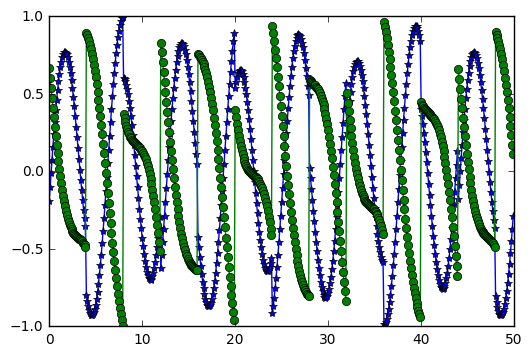

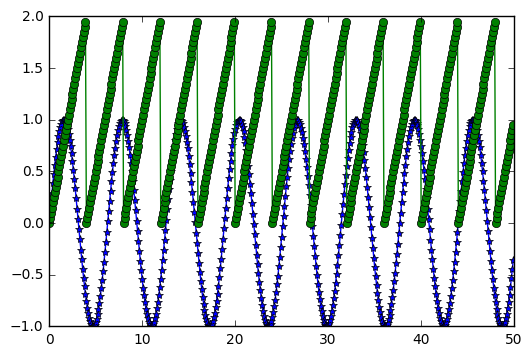

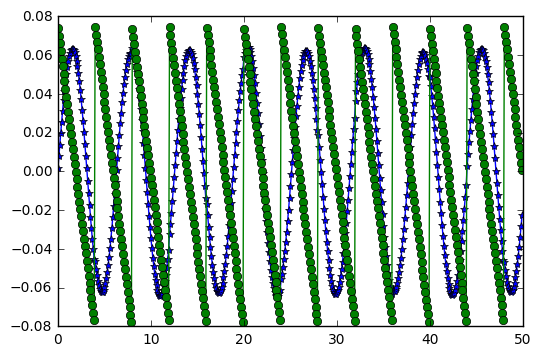

In [15]:
#!/usr/bin/env python

#FastICA from ICA book, table 8.4 

import math
import random
import matplotlib.pyplot as plt
from numpy import *
%matpltlib
n_components = 2

def f1(x, period = 4):
    return 0.5*(x-math.floor(x/period)*period)

def create_data():
    #data number
    n = 500
    #data time
    T = [0.1*xi for xi in range(0, n)]
    #source
    S = array([[sin(xi)  for xi in T], [f1(xi) for xi in T]], float32)
    #mix matrix
    A = array([[0.8, 0.2], [-0.3, -0.7]], float32)
    return T, S, dot(A, S)

def whiten(X):
    #zero mean
    X_mean = X.mean(axis=-1)
    X -= X_mean[:, newaxis]
    #whiten
    A = dot(X, X.transpose())
    D , E = linalg.eig(A)
    D2 = linalg.inv(array([[D[0], 0.0], [0.0, D[1]]], float32))
    D2[0,0] = sqrt(D2[0,0]); D2[1,1] = sqrt(D2[1,1])
    V = dot(D2, E.transpose())
    return dot(V, X), V

def _logcosh(x, fun_args=None, alpha = 1):
    gx = tanh(alpha * x, x); g_x = gx ** 2; g_x -= 1.; g_x *= -alpha
    return gx, g_x.mean(axis=-1)

def do_decorrelation(W):
    #black magic
    s, u = linalg.eigh(dot(W, W.T))
    return dot(dot(u * (1. / sqrt(s)), u.T), W)

def do_fastica(X):
    n, m = X.shape; p = float(m); g = _logcosh
    #black magic
    X *= sqrt(X.shape[1])
    #create w
    W = ones((n,n), float32)
    for i in range(n): 
        for j in range(i):
            W[i,j] = random.random()

    #compute W
    maxIter = 200
    for ii in range(maxIter):
        gwtx, g_wtx = g(dot(W, X))
        W1 = do_decorrelation(dot(gwtx, X.T) / p - g_wtx[:, newaxis] * W)
        lim = max( abs(abs(diag(dot(W1, W.T))) - 1) )
        W = W1
        if lim < 0.0001:
            break
    return W

def show_data(T, S):
    plt.plot(T, [S[0,i] for i in range(S.shape[1])], marker="*")
    plt.plot(T, [S[1,i] for i in range(S.shape[1])], marker="o")
    plt.show()

def main():
    T, S, D = create_data()
    Dwhiten, K = whiten(D)
    W = do_fastica(Dwhiten)
    #Sr: reconstructed source
    Sr = dot(dot(W, K), D)
    show_data(T, D)
    show_data(T, S)
    show_data(T, Sr)

if __name__ == "__main__":
    main()    